# ⚽ Análisis Exploratorio de Jugadores de Fútbol

Este notebook forma parte del proyecto de análisis futbolístico. Exploramos datos de jugadores, sus estadísticas individuales y buscamos patrones relevantes.

---

## HUGO EKITIKE

In [1]:
import os
from pathlib import Path

# Set working directory to project root if running from 'notebooks/'
notebook_dir = Path().resolve()
project_root = notebook_dir.parent  # Assumes notebook is inside 'notebooks/'

os.chdir(project_root)
print(f"✅ Working directory set to: {project_root}")

✅ Working directory set to: F:\JCMDataCenter\Proyectos\Football_analysis


In [2]:
# 📦 Imports
import pandas as pd
from pathlib import Path

# 📂 Load cleaned matchlogs
data_path = Path("data/processed/cleaned_matchlogs.csv")
df = pd.read_csv(data_path)

# 👤 Filter by player ID (Hugo Ekitike)
player_id = "5b92d896"
df_player = df[df["Player_ID"] == player_id].copy()

# 📅 Convert Date column to datetime
df_player["Date"] = pd.to_datetime(df_player["Date"], errors="coerce")

# 📌 Filter seasons by date range
season_2324_start = "2023-07-01"
season_2324_end = "2024-06-30"

season_2425_start = "2024-07-01"
season_2425_end = "2025-06-30"

# 🗓️ Previous season: 2023–2024
df_season_prev = df_player[
    (df_player["Date"] >= season_2324_start) &
    (df_player["Date"] <= season_2324_end)
].copy()

# 🗓️ Last season: 2024–2025
df_season = df_player[
    (df_player["Date"] >= season_2425_start) &
    (df_player["Date"] <= season_2425_end)
].copy()

# 📊 Show how many matches were found
print(f"🕰️ 2023–24: {len(df_season_prev)} matches")
print(f"📆 2024–25: {len(df_season)} matches")


🕰️ 2023–24: 17 matches
📆 2024–25: 48 matches


In [3]:
import pandas as pd
import numpy as np

# 1. Set correct dtypes manually
df_season["Date"] = pd.to_datetime(df_season["Date"], errors="coerce")
df_season["Start"] = df_season["Start"].astype(str).str.strip().str.upper() == "Y"


# 2. Define columns by type
int_cols = [
    "Minutes", "Goals", "Assists", "Penalty_kick", "Penalty_kick_att",
    "Shots", "Shots_on_target", "Yellow_cards", "Red_cards", "Touches",
    "Tackles", "Interceptions", "Blocks", "Shot_creating_actions",
    "Goal_creating_actions", "Passes_completed", "Passes_att",
    "Progressive_passes", "Feet_control", "Progressive_control", "Dribbles_completed"
]

float_cols = ["xG", "non_penalty_xG", "x_assisted_G", "Percent_passes"]

# 3. Convert columns safely
for col in int_cols:
    df_season[col] = pd.to_numeric(df_season[col], errors="coerce")

for col in float_cols:
    df_season[col] = pd.to_numeric(df_season[col], errors="coerce")

# 4. Define who played
df_season["Minutes"] = df_season["Minutes"].fillna(0)
played_mask = df_season["Minutes"] > 0

# 5. Fill NaNs with 0 only for played matches
for col in int_cols + float_cols:
    df_season.loc[played_mask & df_season[col].isna(), col] = 0

# 6. Optional: convert int cols to 'Int64' if you want missing = <NA>
for col in int_cols:
    try:
        # Convert to float and check if all values are integers (e.g. 3.0)
        if df_season[col].dropna().apply(lambda x: float(x).is_integer()).all():
            df_season[col] = df_season[col].astype("Int64")
    except Exception as e:
        print(f"⚠️ Could not convert {col} to Int64: {e}")

# 7. Ensure floats are float64
for col in float_cols:
    df_season[col] = df_season[col].astype("float64")

# ✅ Done
df_season.dtypes



Player_name                      object
Player_ID                        object
Seasons                          object
Date                     datetime64[ns]
Day                              object
Competition                      object
Round                            object
Home_Away                        object
Result                           object
Player_team                      object
Rival_team                       object
Start                              bool
Position                         object
Minutes                           Int64
Goals                             Int64
Assists                           Int64
Penalty_kick                      Int64
Penalty_kick_att                  Int64
Shots                             Int64
Shots_on_target                   Int64
Yellow_cards                      Int64
Red_cards                         Int64
Touches                           Int64
Tackles                           Int64
Interceptions                     Int64


- **Player_name**: Full name of the player.
- **Player_ID**: Unique identifier used by FBref for the player.
- **Seasons**: Season in which the match was played (e.g. 2024–2025).
- **Date**: Match date.
- **Day**: Day of the week the match was played.
- **Competition**: Name of the competition (e.g. Bundesliga, Europa League).
- **Round**: Specific stage of the competition or matchday.
- **Home_Away**: Indicates whether the player’s team played at home or away.
- **Result**: Final match result from the player’s team perspective (e.g. W 3–1).
- **Player_team**: Name of the team the player represented in that match.
- **Rival_team**: Opponent team.

#### 🧑 Player Performance

- **Start**: Whether the player was in the starting lineup (`True`) or came off the bench (`False`).
- **Position**: Position played in the match (e.g. ST, CM, CB).
- **Minutes**: Minutes played during the match.

#### ⚽️ Attacking Output

- **Goals**: Number of goals scored.
- **Assists**: Number of assists provided.
- **Penalty_kick**: Penalty goals scored.
- **Penalty_kick_att**: Total penalties taken.
- **Shots**: Total shot attempts.
- **Shots_on_target**: Shots that were on target.

#### 🟥 Discipline

- **Yellow_cards**: Number of yellow cards received.
- **Red_cards**: Number of red cards received.

#### 🏃 Ball Involvement

- **Touches**: Number of touches on the ball.
- **Tackles**: Tackles attempted.
- **Interceptions**: Number of times the player intercepted an opponent's pass.
- **Blocks**: Blocks made on shots, crosses or passes.

#### 🔮 Expected Metrics

- **xG**: Expected Goals – probability of scoring based on shot quality.
- **non_penalty_xG**: Expected Goals excluding penalties.
- **x_assisted_G**: Expected Assists – likelihood that a pass becomes a goal.

#### 🧠 Creative Play

- **Shot_creating_actions**: Offensive actions (passes, dribbles, fouls drawn) that led to a shot.
- **Goal_creating_actions**: Actions that led directly to a goal.

#### 🎯 Passing & Progression

- **Passes_completed**: Total completed passes.
- **Passes_att**: Total pass attempts.
- **Percent_passes**: Pass completion rate (%).
- **Progressive_passes**: Forward passes moving the ball significantly toward the opponent’s goal.

#### 🏃 Carries & Dribbles

- **Carries**: number of times the player controlled the ball with their feet.
- **Progressive_control**: Carries that moved the ball significantly forward.
- **Dribbles_attempted**: 1v1 dribble attempts.
- **Dribbles_completed**: Successful dribbles past an opponent.


In [4]:
# ✅ PARTICIPATION + OFFENSIVE PRODUCTION – 2024/25 Season

n_matches = len(df_season)
total_minutes = df_season["Minutes"].sum()
avg_minutes = round(total_minutes / n_matches, 1) if n_matches > 0 else 0

n_starts = df_season["Start"].sum()
n_subs = n_matches - n_starts
starter_ratio = round(n_starts / n_matches * 100, 1)

# 🎯 Offensive stats
total_goals = df_season["Goals"].sum()
total_assists = df_season["Assists"].sum()
total_ga = total_goals + total_assists

goals_per_match = round(total_goals / n_matches, 2)
assists_per_match = round(total_assists / n_matches, 2)
ga_per_match = round(total_ga / n_matches, 2)

# 📊 Summary DataFrame
summary = pd.DataFrame({
    "Value": [
        n_matches,
        total_minutes,
        avg_minutes,
        n_starts,
        n_subs,
        f"{starter_ratio} %",
        total_goals,
        total_assists,
        total_ga,
        goals_per_match,
        assists_per_match,
        ga_per_match
    ]
}, index=[
    "Matches played",
    "Total minutes",
    "Avg minutes per match",
    "Starts (as starter)",
    "Substitutes",
    "Starter ratio",
    "Goals",
    "Assists",
    "Goals + Assists (G+A)",
    "Goals per match",
    "Assists per match",
    "G+A per match"
])

summary




,Value
Matches played,48
Total minutes,3618
Avg minutes per match,75.4
Starts (as starter),43
Substitutes,5
Starter ratio,89.6 %
Goals,22
Assists,12
Goals + Assists (G+A),34
Goals per match,0.46


In [5]:
# ✅ ADVANCED OFFENSIVE METRICS – 2024/25 Season

# 🧮 Aggregated totals
xg_total = df_season["xG"].sum()
xag_total = df_season["x_assisted_G"].sum()
xga_total = xg_total + xag_total

sca_total = df_season["Shot_creating_actions"].sum()
gca_total = df_season["Goal_creating_actions"].sum()

# 📊 Averages
xg_per_match = round(xg_total / n_matches, 2)
xag_per_match = round(xag_total / n_matches, 2)
xga_per_match = round(xga_total / n_matches, 2)

sca_per_match = round(sca_total / n_matches, 2)
gca_per_match = round(gca_total / n_matches, 2)

# 🧾 Offensive advanced summary
advanced_offense = pd.DataFrame({
    "Value": [
        round(xg_total, 2),
        round(xag_total, 2),
        round(xga_total, 2),
        xg_per_match,
        xag_per_match,
        xga_per_match,
        sca_total,
        gca_total,
        sca_per_match,
        gca_per_match
    ]
}, index=[
    "Total xG",
    "Total xAG",
    "Total xG + xAG",
    "xG per match",
    "xAG per match",
    "xG + xAG per match",
    "Shot Creating Actions (SCA)",
    "Goal Creating Actions (GCA)",
    "SCA per match",
    "GCA per match"
])

advanced_offense


,Value
Total xG,24.60
Total xAG,9.40
Total xG + xAG,34.00
xG per match,0.51
xAG per match,0.20
xG + xAG per match,0.71
Shot Creating Actions (SCA),131.00
Goal Creating Actions (GCA),20.00
SCA per match,2.73
GCA per match,0.42


In [6]:
efficiency_rows = []

# 🥅 Penalty kicks
pen_made = df_season["Penalty_kick"].sum()
pen_att = df_season["Penalty_kick_att"].sum()
pen_pct = round((pen_made / pen_att) * 100, 1) if pen_att > 0 else 0

efficiency_rows.append(["Penalty Kicks", "Scored", pen_made])
efficiency_rows.append(["Penalty Kicks", "Attempted", pen_att])
efficiency_rows.append(["Penalty Kicks", "Conversion Rate (%)", pen_pct])

# 🎯 Shots on target
shots = df_season["Shots"].sum()
shots_on_target = df_season["Shots_on_target"].sum()
sot_pct = round((shots_on_target / shots) * 100, 1) if shots > 0 else 0

efficiency_rows.append(["Shots", "Total shots", shots])
efficiency_rows.append(["Shots", "On target", shots_on_target])
efficiency_rows.append(["Shots", "Accuracy (%)", sot_pct])

# 📨 Pass accuracy 
passes_cmp = df_season["Passes_completed"].sum()
passes_att = df_season["Passes_att"].sum()
pass_pct = round((passes_cmp / passes_att) * 100, 1) if passes_att > 0 else 0

efficiency_rows.append(["Passes", "Attempted", passes_att])
efficiency_rows.append(["Passes", "Completed", passes_cmp])
efficiency_rows.append(["Passes", "Accuracy (%)", pass_pct])

# Create table
efficiency_summary = pd.DataFrame(
    efficiency_rows, columns=["Action", "Metric", "Value"]
).set_index(["Action", "Metric"])

efficiency_summary


Value
Action        Metric                    
Penalty Kicks Scored                 1.0
              Attempted              3.0
              Conversion Rate (%)   33.3
Shots         Total shots          151.0
              On target             60.0
              Accuracy (%)          39.7
Passes        Attempted            858.0
              Completed            646.0
              Accuracy (%)          75.3

In [7]:
# ✅ EXTENDED SUMMARY – Ball Involvement & Actions

# Define number of games played (minimum 1 minute)
games_played = df_season[df_season["Minutes"] > 0].shape[0]

involvement_rows = []

# 🔄 Touches
total_touches = df_season["Touches"].sum()
avg_touches_per_game = round(total_touches / games_played, 1)
involvement_rows.append(["Touches", "Total", total_touches])
involvement_rows.append(["Touches", "Average per game", avg_touches_per_game])

# 🦶 Carries (Ball control)
total_carries = df_season["Feet_control"].sum()
avg_carries_per_game = round(total_carries / games_played, 1)
involvement_rows.append(["Carries", "Total", total_carries])
involvement_rows.append(["Carries", "Average per game", avg_carries_per_game])

# 🚀 Progressive passes and carries
prg_passes = df_season["Progressive_passes"].sum()
prg_carries = df_season["Progressive_control"].sum()
involvement_rows.append(["Progressions", "Progressive passes", prg_passes])
involvement_rows.append(["Progressions", "Progressive carries", prg_carries])

# 🪄 Dribbles completed
dribbling_success = df_season["Dribbles_completed"].sum()
avg_dribbles_per_game = round(dribbling_success / games_played, 1)
involvement_rows.append(["Dribbles", "Successful", dribbling_success])
involvement_rows.append(["Dribbles", "Average per game", avg_dribbles_per_game])

# 📋 Create DataFrame
involvement_summary = pd.DataFrame(
    involvement_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

involvement_summary


Value
Category     Metric                     
Touches      Total                1401.0
             Average per game       29.2
Carries      Total                 851.0
             Average per game       17.7
Progressions Progressive passes     73.0
             Progressive carries   114.0
Dribbles     Successful             71.0
             Average per game        1.5

In [8]:
# ✅ EXTENDED SUMMARY – Expected Metrics (xG, xAG, npxG)

expected_rows = []

# 🎯 Expected Goals (xG) vs Goals
total_xg = df_season["xG"].sum()
total_goals = df_season["Goals"].sum()
xg_diff = round(total_goals - total_xg, 2)  # Difference between actual and expected

expected_rows.append(["Expected Goals", "xG total", round(total_xg, 2)])
expected_rows.append(["Expected Goals", "Goals scored", total_goals])
expected_rows.append(["Expected Goals", "Difference (G - xG)", xg_diff])

# 🚫 Non-penalty Expected Goals
total_npxg = df_season["non_penalty_xG"].sum()
expected_rows.append(["Expected Goals", "Non-penalty xG", round(total_npxg, 2)])

# 🎁 Expected Assists (xAG) vs Real Assists
total_xag = df_season["x_assisted_G"].sum()
total_assists = df_season["Assists"].sum()
xag_diff = round(total_assists - total_xag, 2)

expected_rows.append(["Expected Assists", "xAG total", round(total_xag, 2)])
expected_rows.append(["Expected Assists", "Assists", total_assists])
expected_rows.append(["Expected Assists", "Difference (A - xAG)", xag_diff])

# 📋 Create DataFrame
expected_summary = pd.DataFrame(
    expected_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

expected_summary


Value
Category         Metric                     
Expected Goals   xG total               24.6
                 Goals scored           22.0
                 Difference (G - xG)    -2.6
                 Non-penalty xG         22.2
Expected Assists xAG total               9.4
                 Assists                12.0
                 Difference (A - xAG)    2.6

In [9]:
# ✅ EXTENDED SUMMARY – Shot & Goal Creating Actions (SCA & GCA)

creating_rows = []

# 🧠 Shot-Creating Actions
total_sca = df_season["Shot_creating_actions"].sum()
avg_sca_per_game = round(total_sca / games_played, 2)

creating_rows.append(["Shot-Creating Actions", "Total", total_sca])
creating_rows.append(["Shot-Creating Actions", "Average per game", avg_sca_per_game])

# 🧨 Goal-Creating Actions
total_gca = df_season["Goal_creating_actions"].sum()
avg_gca_per_game = round(total_gca / games_played, 2)

creating_rows.append(["Goal-Creating Actions", "Total", total_gca])
creating_rows.append(["Goal-Creating Actions", "Average per game", avg_gca_per_game])

# 📋 Create DataFrame
creating_summary = pd.DataFrame(
    creating_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

creating_summary


Value
Category              Metric                  
Shot-Creating Actions Total             131.00
                      Average per game    2.73
Goal-Creating Actions Total              20.00
                      Average per game    0.42

In [10]:
# ✅ EXTENDED SUMMARY – Defensive Contributions

defensive_rows = []

# 🛡️ Tackles
total_tackles = df_season["Tackles"].sum()
avg_tackles_per_game = round(total_tackles / games_played, 2)
defensive_rows.append(["Tackles", "Total", total_tackles])
defensive_rows.append(["Tackles", "Average per game", avg_tackles_per_game])

# 🕵️ Interceptions
total_interceptions = df_season["Interceptions"].sum()
avg_interceptions_per_game = round(total_interceptions / games_played, 2)
defensive_rows.append(["Interceptions", "Total", total_interceptions])
defensive_rows.append(["Interceptions", "Average per game", avg_interceptions_per_game])

# 🧱 Blocks
total_blocks = df_season["Blocks"].sum()
avg_blocks_per_game = round(total_blocks / games_played, 2)
defensive_rows.append(["Blocks", "Total", total_blocks])
defensive_rows.append(["Blocks", "Average per game", avg_blocks_per_game])

# 📋 Create DataFrame
defensive_summary = pd.DataFrame(
    defensive_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

defensive_summary


Value
Category      Metric                 
Tackles       Total             23.00
              Average per game   0.48
Interceptions Total             13.00
              Average per game   0.27
Blocks        Total             14.00
              Average per game   0.29

In [11]:
# ✅ EXTENDED SUMMARY – Discipline & Fouls

discipline_rows = []

# 🟨 Yellow cards
yellow_cards = df_season["Yellow_cards"].sum()
avg_yellow_per_game = round(yellow_cards / games_played, 2)
discipline_rows.append(["Cards", "Yellow cards", yellow_cards])
discipline_rows.append(["Cards", "Avg yellow per game", avg_yellow_per_game])

# 🟥 Red cards
red_cards = df_season["Red_cards"].sum()
avg_red_per_game = round(red_cards / games_played, 2)
discipline_rows.append(["Cards", "Red cards", red_cards])
discipline_rows.append(["Cards", "Avg red per game", avg_red_per_game])

# ⚠️ Optional: Fouls committed and drawn
if "Fouls_committed" in df_season.columns and "Fouls_drawn" in df_season.columns:
    fouls_committed = df_season["Fouls_committed"].sum()
    fouls_drawn = df_season["Fouls_drawn"].sum()
    discipline_rows.append(["Fouls", "Committed", fouls_committed])
    discipline_rows.append(["Fouls", "Drawn", fouls_drawn])

# 📋 Create DataFrame
discipline_summary = pd.DataFrame(
    discipline_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

discipline_summary


Value
Category Metric                    
Cards    Yellow cards          3.00
         Avg yellow per game   0.06
         Red cards             0.00
         Avg red per game      0.00

In [12]:
# ✅ EXTENDED SUMMARY – Dribbling Efficiency

dribble_rows = []

# ⚡ Dribbles attempted and completed
dribbles_attempted = df_season["Dribbles_attempted"].sum()
dribbles_completed = df_season["Dribbles_completed"].sum()
dribble_success_rate = (
    round((dribbles_completed / dribbles_attempted) * 100, 1)
    if dribbles_attempted > 0 else 0
)

# 📊 Averages per game
avg_dribbles_attempted = round(dribbles_attempted / games_played, 2)
avg_dribbles_completed = round(dribbles_completed / games_played, 2)

# 📝 Append results
dribble_rows.append(["Dribbles", "Attempted", dribbles_attempted])
dribble_rows.append(["Dribbles", "Completed", dribbles_completed])
dribble_rows.append(["Dribbles", "Success Rate (%)", dribble_success_rate])
dribble_rows.append(["Dribbles", "Avg Attempted per Game", avg_dribbles_attempted])
dribble_rows.append(["Dribbles", "Avg Completed per Game", avg_dribbles_completed])

# 📋 Create DataFrame
dribble_summary = pd.DataFrame(
    dribble_rows, columns=["Category", "Metric", "Value"]
).set_index(["Category", "Metric"])

dribble_summary


Value
Category Metric                        
Dribbles Attempted               160.00
         Completed                71.00
         Success Rate (%)         44.40
         Avg Attempted per Game    3.33
         Avg Completed per Game    1.48

In [13]:
import plotly.graph_objects as go

# Ensure you have calculated these beforehand
minutes_played = df_season["Minutes"].sum()
games_played = df_season[df_season["Minutes"] > 0].shape[0]
minutes_per_game = minutes_played / games_played if games_played > 0 else 0

# Core stats
goals = df_season["Goals"].sum()
assists = df_season["Assists"].sum()
ga = goals + assists

shots_on_target = df_season["Shots_on_target"].sum()
sca = df_season["Shot_creating_actions"].sum()
prog_passes = df_season["Progressive_passes"].sum()
prog_carries = df_season["Progressive_control"].sum()
tackles = df_season["Tackles"].sum()
interceptions = df_season["Interceptions"].sum()

# Metrics per 90'
goals_per90 = round(goals / minutes_played * 90, 2)
assists_per90 = round(assists / minutes_played * 90, 2)
ga_per90 = round(ga / minutes_played * 90, 2)
shots_on_target_per90 = round(shots_on_target / minutes_played * 90, 2)
sca_per90 = round(sca / minutes_played * 90, 2)
prog_passes_per90 = round(prog_passes / minutes_played * 90, 2)
prog_carries_per90 = round(prog_carries / minutes_played * 90, 2)
tackles_int_per90 = round((tackles + interceptions) / minutes_played * 90, 2)

# Radar values
labels = [
    "Goals / 90’", "Assists / 90’", "G+A / 90’", "SoT / 90’",
    "SCA / 90’", "Progressive passes / 90’", "Progressive carries / 90’", "Tackles+Interceptions / 90’"
]
values = [
    goals_per90, assists_per90, ga_per90, shots_on_target_per90,
    sca_per90, prog_passes_per90, prog_carries_per90, tackles_int_per90
]

# Close the radar chart loop
labels += [labels[0]]
values += [values[0]]

# Plotly Radar Chart
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=labels,
    fill='toself',
    name='Player'
))
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(values) * 1.1])
    ),
    showlegend=False,
    title="Radar Chart – Player Output per 90 Minutes"
)
fig.show()


In [14]:
print("📅 Fechas 2023–24:", df_season_prev["Date"].min(), "→", df_season_prev["Date"].max())
print("📅 Fechas 2024–25:", df_season["Date"].min(), "→", df_season["Date"].max())


📅 Fechas 2023–24: 2023-08-12 00:00:00 → 2024-05-18 00:00:00
📅 Fechas 2024–25: 2024-08-19 00:00:00 → 2025-05-17 00:00:00


In [15]:
games_prev = df_season_prev[df_season_prev["Minutes"] > 0].shape[0]
games_current = df_season[df_season["Minutes"] > 0].shape[0]
print(f"📌 Partidos 23-24: {games_prev} | 24-25: {games_current}")


📌 Partidos 23-24: 17 | 24-25: 48


In [16]:
def get_stats_per_90(df, minutes_threshold=1):
    df_valid = df[df["Minutes"].astype(float) >= minutes_threshold].copy()
    total_minutes = df_valid["Minutes"].astype(float).sum() or 1  # Evitar división entre cero

    return {
        "Goals / 90'": round(df_valid["Goals"].astype(float).sum() / total_minutes * 90, 2),
        "Assists / 90'": round(df_valid["Assists"].astype(float).sum() / total_minutes * 90, 2),
        "G+A / 90'": round(
            (df_valid["Goals"].astype(float).sum() + df_valid["Assists"].astype(float).sum()) / total_minutes * 90, 2
        ),
        "SoT %": round(
            df_valid["Shots_on_target"].astype(float).sum() / df_valid["Shots"].astype(float).sum() * 100, 1
        ) if df_valid["Shots"].astype(float).sum() > 0 else 0,
        "Pass acc. %": round(
            df_valid["Passes_completed"].astype(float).sum() / df_valid["Passes_att"].astype(float).sum() * 100, 1
        ) if df_valid["Passes_att"].astype(float).sum() > 0 else 0,
        "Progressive passes / 90'": round(df_valid["Progressive_passes"].astype(float).sum() / total_minutes * 90, 2),
        "Progressive carries / 90'": round(df_valid["Progressive_control"].astype(float).sum() / total_minutes * 90, 2),
        "Dribble success %": round(
            df_valid["Dribbles_completed"].astype(float).sum() /
            df_valid["Dribbles_attempted"].astype(float).sum() * 100, 1
        ) if df_valid["Dribbles_attempted"].astype(float).sum() > 0 else 0,
        "SCA / 90'": round(df_valid["Shot_creating_actions"].astype(float).sum() / total_minutes * 90, 2),
        "Tackles+Interceptions / 90'": round(
            (df_valid["Tackles"].astype(float).sum() + df_valid["Interceptions"].astype(float).sum()) / total_minutes * 90, 2
        )
    }


In [17]:
stats_prev = get_stats_per_90(df_season_prev)
stats_last = get_stats_per_90(df_season)


In [18]:
import pandas as pd

# Convert dicts to DataFrame
radar_df = pd.DataFrame([stats_prev, stats_last], index=["2023-24", "2024-25"]).T.reset_index()
radar_df.columns = ["Metric", "2023-24", "2024-25"]
radar_df


,Metric,2023-24,2024-25
0,Goals / 90',0.46,0.55
1,Assists / 90',0.23,0.30
2,G+A / 90',0.69,0.85
3,SoT %,29.00,39.70
4,Pass acc. %,67.30,75.30
5,Progressive passes / 90',1.15,1.82
6,Progressive carries / 90',1.96,2.84
7,Dribble success %,46.20,44.40
8,SCA / 90',3.23,3.26
9,Tackles+Interceptions / 90',1.50,0.90


In [22]:
import pandas as pd
import plotly.graph_objects as go

# === Player per90 stats for two seasons ===
player_stats_current = {
    "Goals / 90’": 0.28,
    "Assists / 90’": 0.41,
    "G+A / 90’": 0.69,
    "SoT %": 42.1,
    "Pass acc. %": 86.2,
    "Progressive passes / 90’": 3.1,
    "Progressive carries / 90’": 5.8,
    "Dribble success %": 61.5,
    "SCA / 90’": 2.9,
    "Tackles+Interceptions / 90’": 1.1,
}

player_stats_previous = {
    "Goals / 90’": 0.19,
    "Assists / 90’": 0.15,
    "G+A / 90’": 0.34,
    "SoT %": 30.5,
    "Pass acc. %": 83.0,
    "Progressive passes / 90’": 2.1,
    "Progressive carries / 90’": 4.4,
    "Dribble success %": 47.2,
    "SCA / 90’": 1.8,
    "Tackles+Interceptions / 90’": 1.4,
}

# === Define normalizing scale for each stat
scales = {
    "Goals / 90’": (0, 1.0),
    "Assists / 90’": (0, 1.0),
    "G+A / 90’": (0, 2.0),
    "SoT %": (0, 100),
    "Pass acc. %": (50, 95),
    "Progressive passes / 90’": (0, 10),
    "Progressive carries / 90’": (0, 15),
    "Dribble success %": (0, 100),
    "SCA / 90’": (0, 5),
    "Tackles+Interceptions / 90’": (0, 5),
}

# === Normalize values between 0 and 1
def normalize(value, min_val, max_val):
    return max(0, min((value - min_val) / (max_val - min_val), 1))

normalized_current = [normalize(player_stats_current[k], *scales[k]) for k in player_stats_current]
normalized_previous = [normalize(player_stats_previous[k], *scales[k]) for k in player_stats_previous]
categories = list(player_stats_current.keys())

# === Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=normalized_current + [normalized_current[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='2024–2025 Season',
    line=dict(color='rgba(44, 160, 101, 1)')
))

fig.add_trace(go.Scatterpolar(
    r=normalized_previous + [normalized_previous[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='2023–2024 Season',
    line=dict(color='rgba(255, 99, 71, 1)')
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], tickvals=[0, 0.5, 1])
    ),
    showlegend=True,
    title="Normalized Radar Chart – Hugo Ekitike (per 90 minutes)"
)

fig.show()


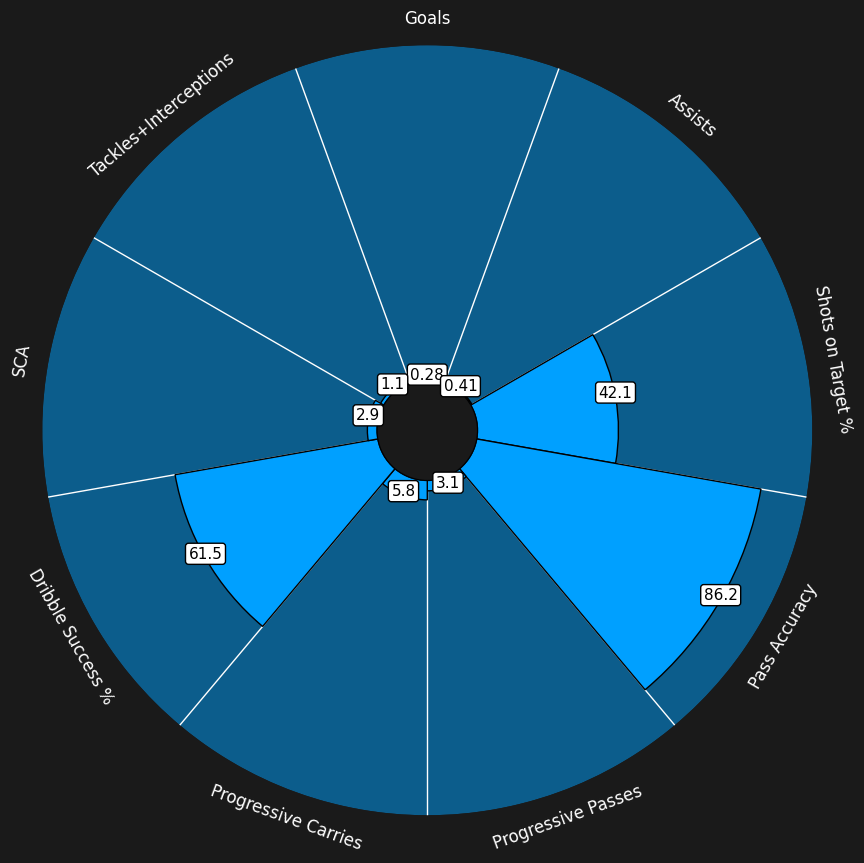

In [24]:
from mplsoccer import PyPizza, FontManager

# Parameters and values
params = ['Goals', 'Assists', 'Shots on Target %', 'Pass Accuracy', 'Progressive Passes',
          'Progressive Carries', 'Dribble Success %', 'SCA', 'Tackles+Interceptions']
values = [0.28, 0.41, 42.1, 86.2, 3.1, 5.8, 61.5, 2.9, 1.1]

# Instantiate
baker = PyPizza(
    params=params,
    background_color="#1A1A1A",
    straight_line_color="#FFFFFF",
    straight_line_lw=1,
    last_circle_lw=0,
    last_circle_color="#FFFFFF",
    other_circle_lw=0,
    other_circle_color="#FFFFFF",
    inner_circle_size=15
)

# Make figure
fig, ax = baker.make_pizza(
    values, figsize=(10, 10),
    color_blank_space="same",
    slice_colors=["#00A0FF"]*len(values),
    value_colors=["#000000"]*len(values),
    value_bck_colors=["#FFFFFF"]*len(values),
    kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
    kwargs_params=dict(color="#FFFFFF", fontsize=12, va="center"),
    kwargs_values=dict(color="#000000", fontsize=11, zorder=3,
                       bbox=dict(edgecolor="#000000", facecolor="white", boxstyle="round,pad=0.2", lw=1))
)
